In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [6]:
AIRPORT_ICAO = "ESGG"
#AIRPORT_ICAO = "ESSA"

remove_outliers = True

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# TIF
filename = AIRPORT_ICAO + "_metrics_TIF_horizontal_PIs_by_hour.csv"
metrics_TIF_horizontal_PIs_by_hour_df = pd.read_csv(filename, sep=' ')

# Average Additional Distance

## Medians of Average Additional Distance in TMA vs TIF

                            OLS Regression Results                            
Dep. Variable:      addDistanceMedian   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     46.99
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           0.000130
Time:                        13:36:14   Log-Likelihood:                -22.996
No. Observations:                  10   AIC:                             49.99
Df Residuals:                       8   BIC:                             50.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8006      1.843      4.776      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


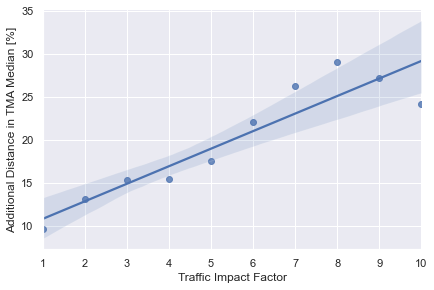

In [7]:
df = metrics_TIF_horizontal_PIs_by_hour_df.copy()
df = df[df['numberOfFlights']>0]

if remove_outliers:
    p1 = df["distanceChangePercentMean"].quantile(0.05)
    p2 = df["distanceChangePercentMean"].quantile(0.95)
    df = df.loc[(df['distanceChangePercentMean'] > p1) & (df['distanceChangePercentMean'] < p2) ]

df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['TIF', 'addDistanceMedian'])

for idx, group in df.groupby(level='TIF'):
    
    idx_df = group['distanceChangePercentMean']
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Additional Distance in TMA Median [%]')

#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['addDistanceMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())